In [1]:
import ROOT
from matplotlib import pyplot as plt
import pandas as pd

Welcome to JupyROOT 6.28/04


In [2]:
file_name = "rechit_histograms_20231031.root"
my_file = ROOT.TFile.Open(file_name)

my_file.goodTracks.ls()

TDirectoryFile*		goodTracks	goodTracks
 KEY: TH2D	XY;1	XY
 KEY: TH2D	RZ;1	RZ
 KEY: TH1I	nHitsPerLayer;1	nHitsPerLayer
 KEY: TH1I	nTracksPerLayer;1	nTracksPerLayer
 KEY: TH1I	nTracksPerPair;1	nTracksPerPair
 KEY: TH1I	nTracksPerTriple;1	nTracksPerTriple
 KEY: TH2I	nTracks;1	nTracks
 KEY: TH2I	nTracksSeq;1	nTracksSeq
 KEY: TH1I	nHitsPerTrack;1	nHitsPerTrack
 KEY: TH1I	nSegmentsPerTrack;1	nSegmentsPerTrack
 KEY: TH1I	nSegmentsNoLoopPerTrack;1	nSegmentsNoLoopPerTrack
 KEY: TDirectoryFile	maxHitDistance;1	maxHitDistance
 KEY: TDirectoryFile	nHitsPerTrackSegment;1	nHitsPerTrackSegment
 KEY: TDirectoryFile	pt;1	pt
 KEY: TDirectoryFile	tof;1	tof
 KEY: TDirectoryFile	iphi;1	iphi
 KEY: TDirectoryFile	z0;1	z0
 KEY: TDirectoryFile	curvature;1	curvature
 KEY: TDirectoryFile	dca;1	dca
 KEY: TDirectoryFile	dcaRc;1	dcaRc
 KEY: TDirectoryFile	rc;1	rc
 KEY: TDirectoryFile	theta;1	theta


In [3]:
file_name = "rechit_histograms_20231031.root"
my_file = ROOT.TFile.Open(file_name)

#open file and read in histograms
#my_file.ls()
histograms = {}
for key in my_file.goodTracks.rc.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.theta.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.dca.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.dcaRc.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
for key in my_file.goodTracks.curvature.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist


In [4]:
# loop over all histograms and retrieve mean and std dev

def parse_hist_name(hist_name):
    l1 = l2 = l3 = -1
    cut = "minus one"
    if len(hist_name.split("_")) > 1:
        (cut, l1, l2, l3) = hist_name.split("_")
    return (cut, int(l1), int(l2), int(l3)) 

df = pd.DataFrame(columns=["cut", "entries", "mean", "std dev", "triplet ID", "layer 1", "layer 2", "layer 3", "label"])
cuts = ["dca", "theta", "rc", "dcaRc", "curvature"]
for hist_name in histograms:
    (cut, layer1, layer2, layer3) = parse_hist_name(hist_name)
    mean = histograms[hist_name].GetMean()
    stddev = histograms[hist_name].GetStdDev()
    entries = histograms[hist_name].GetEntries()

    if cut != "minus one":
        df_tmp = pd.DataFrame({"cut": cut, 
                               "entries": entries, 
                               "mean": mean, 
                               "std dev":stddev, 
                               "triplet ID":-1, 
                               "layer 1": layer1,
                               "layer 2": layer2,
                               "layer 3": layer3,
                               "label": str(layer1) + "_" + str(layer2) + "_" + str(layer3)}, index=[0])
        df = pd.concat([df, df_tmp], ignore_index=True)
df.set_index("label",drop=True,inplace=True)
df    

/var/folders/0m/wpyd3rf50ndd6p3t8qxnqkjm0000gn/T/ipykernel_53260/394293821.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
label,,,,,,,,
0_1_2,rc,19221.0,255.174726,263.511440,-1,0,1,2
0_1_3,rc,15559.0,271.096525,274.220110,-1,0,1,3
0_1_4,rc,5322.0,212.425225,233.559043,-1,0,1,4
0_1_7,rc,5766.0,207.587361,240.682308,-1,0,1,7
0_1_10,rc,21849.0,270.935909,267.328537,-1,0,1,10
...,...,...,...,...,...,...,...,...
7_10_11,curvature,696.0,0.019713,0.024423,-1,7,10,11
8_9_10,curvature,243.0,0.068114,0.042490,-1,8,9,10
8_9_11,curvature,149.0,0.046040,0.018549,-1,8,9,11


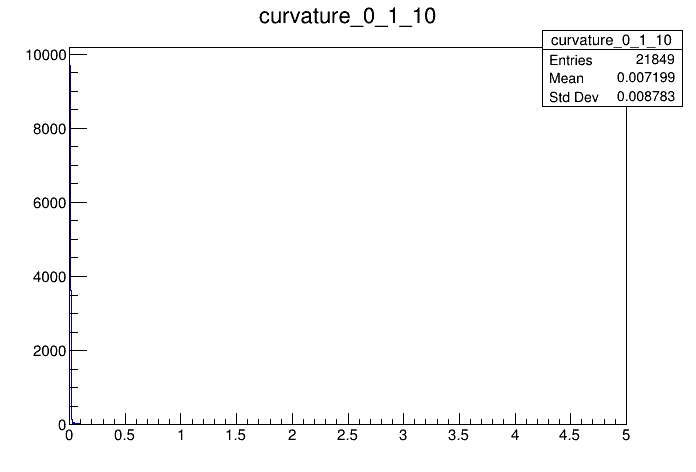

In [5]:
c = ROOT.TCanvas()
histograms["curvature_0_1_10"].Draw()
c.Draw()

In [6]:
#define cuts that discriminate between strips and no strips:
hasStrip = (df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)
hasNoStrip =  (df["layer 2"] != 10) & (df["layer 2"] != 11) & (df["layer 3"] != 10) & (df["layer 3"] != 11)

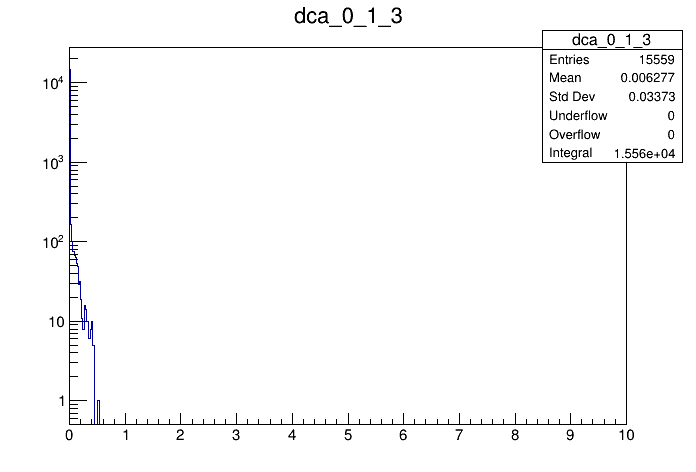

In [7]:
c = ROOT.TCanvas()
histograms["dca_0_1_3"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

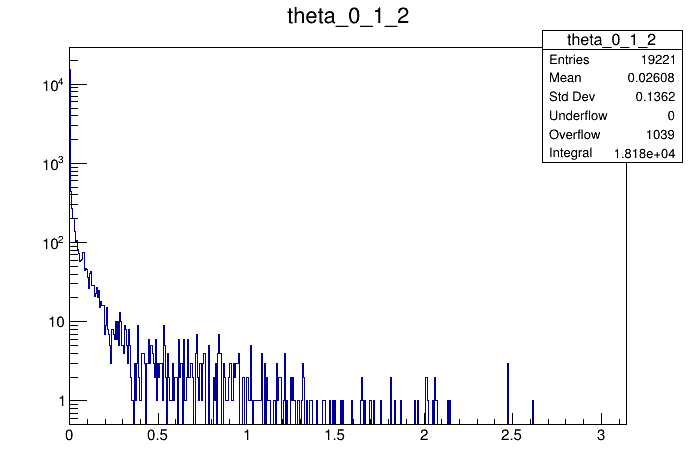

In [8]:
c = ROOT.TCanvas()
histograms["theta_0_1_2"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

In [9]:
#adding a figure of merit:
df["FoM"] = df["mean"] + 2 * df["std dev"]

In [10]:
#How many events survive the FoM cut?

fom_efficiency = []
for index, row in df.iterrows():
    hist_name = row["cut"] + "_" + str(row["layer 1"]) + "_" + str(row["layer 2"]) + "_" + str(row["layer 3"])
    fom = row["FoM"]
    n = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(fom)))
    d = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(5000)))
    fom_efficiency.append(n/d)

df["FoM efficiency"] = fom_efficiency

df

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,FoM,FoM efficiency
label,,,,,,,,,,
0_1_2,rc,19221.0,255.174726,263.511440,-1,0,1,2,782.197605,0.893918
0_1_3,rc,15559.0,271.096525,274.220110,-1,0,1,3,819.536745,0.888875
0_1_4,rc,5322.0,212.425225,233.559043,-1,0,1,4,679.543311,0.917512
0_1_7,rc,5766.0,207.587361,240.682308,-1,0,1,7,688.951978,0.908255
0_1_10,rc,21849.0,270.935909,267.328537,-1,0,1,10,805.592983,0.889194
...,...,...,...,...,...,...,...,...,...,...
7_10_11,curvature,696.0,0.019713,0.024423,-1,7,10,11,0.068558,0.943966
8_9_10,curvature,243.0,0.068114,0.042490,-1,8,9,10,0.153094,0.954733
8_9_11,curvature,149.0,0.046040,0.018549,-1,8,9,11,0.083139,0.973154


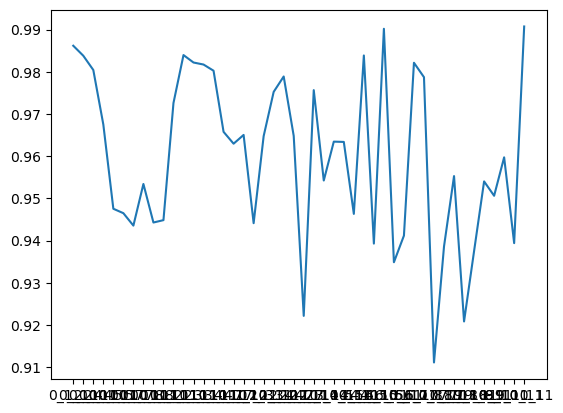

In [11]:
plt.plot(df.loc[(df["cut"]=="dca") & hasStrip,"FoM efficiency"])

<Axes: xlabel='label'>

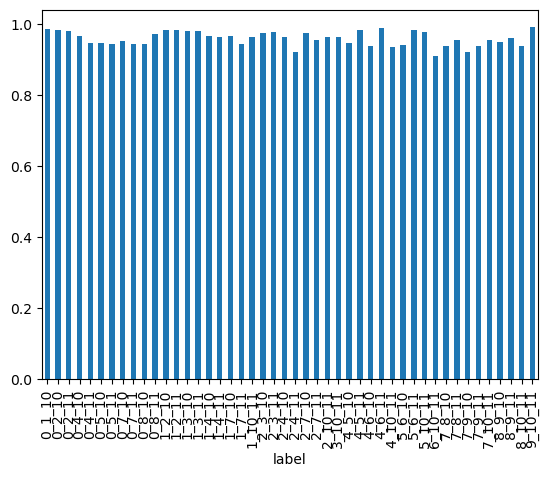

In [12]:
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"FoM efficiency"].plot.bar()

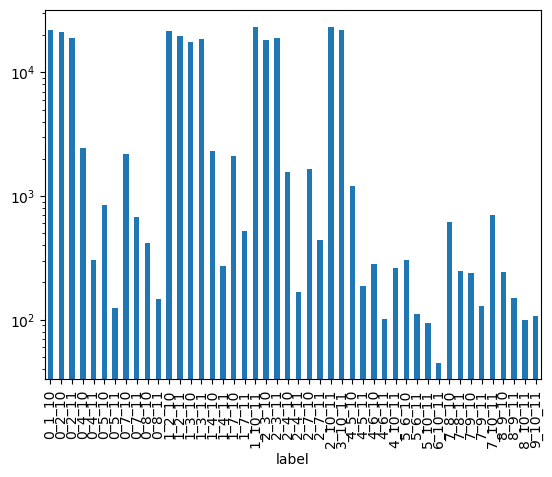

In [13]:
fig, ax = plt.subplots()
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"entries"].plot.bar()
ax.set_yscale('log')